# Лабораторная работа №5

## Ансамбли моделей машинного обучения.


### Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

Для данной лабораторной работы был использован данный датасет: https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data
                                                               

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('clean_dataset.csv')
data

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


### Предварительная обработка

Удаляем столбцы с пустыми значениями:

In [ ]:
data = data.dropna(axis=1, how='any')
data

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [ ]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Gender - int64 - 0
Age - float64 - 0
Debt - float64 - 0
Married - int64 - 0
BankCustomer - int64 - 0
Industry - object - 0
Ethnicity - object - 0
YearsEmployed - float64 - 0
PriorDefault - int64 - 0
Employed - int64 - 0
CreditScore - int64 - 0
DriversLicense - int64 - 0
Citizen - object - 0
ZipCode - int64 - 0
Income - int64 - 0
Approved - int64 - 0


In [ ]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Industry
Ethnicity
Citizen


In [ ]:
le1 = LabelEncoder()
data['Industry'] = le1.fit_transform(data['Industry'])
le2 = LabelEncoder()
data['Ethnicity'] = le2.fit_transform(data['Ethnicity'])
le3 = LabelEncoder()
data['Citizen'] = le3.fit_transform(data['Citizen'])

In [ ]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

### Разделение выборки на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != 'Approved']
data_y = data['Approved']

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [ ]:
train_x.shape

(483, 15)

In [ ]:
test_x.shape

(207, 15)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y, model.predict(test_x)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y, model.predict(test_x)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y, model.predict(test_x)), 2)))

# Обучение моделей
## Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x, train_y)

RandomForestRegressor(n_estimators=80)

In [ ]:
test_model(ran_80)

mean_absolute_error: 0.19
median_absolute_error: 0.07
r2_score: 0.59


In [ ]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [ ]:
reg = gs.best_estimator_

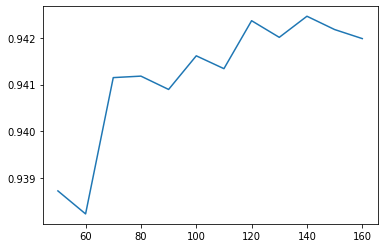

In [ ]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

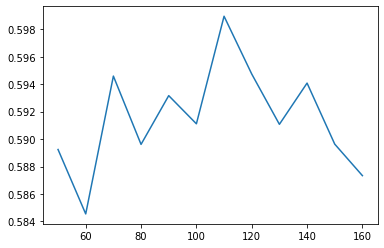

In [ ]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [ ]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 0.19
median_absolute_error: 0.07
r2_score: 0.59


### Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x, train_y)

GradientBoostingRegressor(n_estimators=80)

In [ ]:
test_model(gr_80)

mean_absolute_error: 0.21
median_absolute_error: 0.13
r2_score: 0.59


In [ ]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [ ]:
reg = gs.best_estimator_

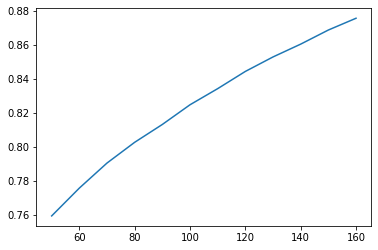

In [ ]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

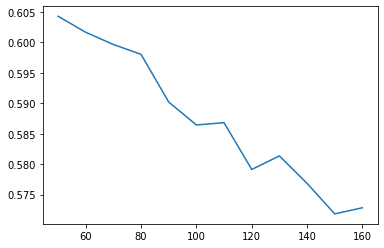

In [ ]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [ ]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 0.21
median_absolute_error: 0.12
r2_score: 0.59
